# Reference point: Centroid

## Question

How different are centroids which are calculated based on all pocket atoms or pocket CA atoms only?

## Experiment

Calculate for all pockets the distance between centroids which are calculated based on all pocket atoms or pocket CA atoms only.

## Imports

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from pathlib import Path
import sys

import pandas as pd
import scipy

sys.path.append('../..')
from kinsim_structure.auxiliary import KlifsMoleculeLoader

## IO paths

In [4]:
path_to_kinsim = Path('/') / 'home' / 'dominique' / 'Documents' / 'Projects' / 'kinsim_structure'
path_to_data = Path('/') / 'home' / 'dominique' / 'Documents' / 'data' / 'kinsim' / '20190724_full'

#path_to_results = path_to_kinsim / 'examples'/ 'results'

metadata_path = path_to_data / 'postprocessed' / 'klifs_metadata_postprocessed.csv'

## Load metadata

In [5]:
klifs_metadata = pd.read_csv(metadata_path, index_col=0)
klifs_metadata.shape

(3878, 23)

In [6]:
def calc_distance_centroid_all_vs_centroids_ca(klifs_metadata_entry):
    """
    Calculate the distance between two centroids which are based on (i) all and (ii) CA atoms of a pocket.
    
    Parameters
    ----------
    klifs_metadata_entry : pandas.Series
        KLIFS metadata describing a pocket entry in the KLIFS dataset.
    
    Returns
    -------
    float
        Distance between the two centroids.
    """
    
    # Load structural data of pocket
    ml = KlifsMoleculeLoader(klifs_metadata_entry=klifs_metadata_entry)
    molecule = ml.molecule

    # Get centroid for all atoms
    centroid_all = molecule.df['x y z'.split()].mean()

    # Get centroid for all CA atoms
    centroid_ca = molecule.df[molecule.df.atom_name == 'CA']['x y z'.split()].mean()

    # Get distance between both centroids
    centroid_distance = scipy.linalg.norm(centroid_all - centroid_ca)

    return round(centroid_distance, 2)

In [7]:
centroid_distances = klifs_metadata.apply(
    lambda x: calc_distance_centroid_all_vs_centroids_ca(x), 
    axis=1
)

In [8]:
centroid_distances.name = 'Centroid distances'

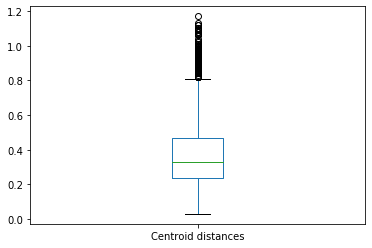

In [9]:
centroid_distances.plot.box()

In [10]:
centroid_distances.describe()

count    3878.000000
mean        0.372339
std         0.184770
min         0.030000
25%         0.240000
50%         0.330000
75%         0.470000
max         1.170000
Name: Centroid distances, dtype: float64